In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read dataframe in
df = pd.read_csv('data/kickstarter_preprocess.csv')

In [3]:
df.columns
df.shape

(177593, 26)

In [4]:
df = df.drop(df[df['state'] == "canceled" ].index)
df.shape

(168975, 26)

In [5]:
categories = ["Games", "Art", "Photography", "Film & Video", "Design", "Technology"]
df = df[df.parent_name.isin(categories)]
df.shape

(82036, 26)

In [6]:
# drop unimportant features
df.drop(['backers_count', 'country', 'blurb_len_c', 'slug_len_c', 'cat_in_slug', 
         'category_parent_id', 'category_id', 'category_name', 'created_year', 'created_month', 'deadline_year', 
         'deadline_month', 'launched_year', 'rel_pledged_goal', 'filled_parent'], 
        axis=1, inplace=True)
df.shape
df.columns

Index(['goal', 'staff_pick', 'state', 'usd_pledged', 'blurb_len_w',
       'slug_len_w', 'launched_month', 'duration_days', 'preparation',
       'pledged_per_backer', 'parent_name'],
      dtype='object')

## category

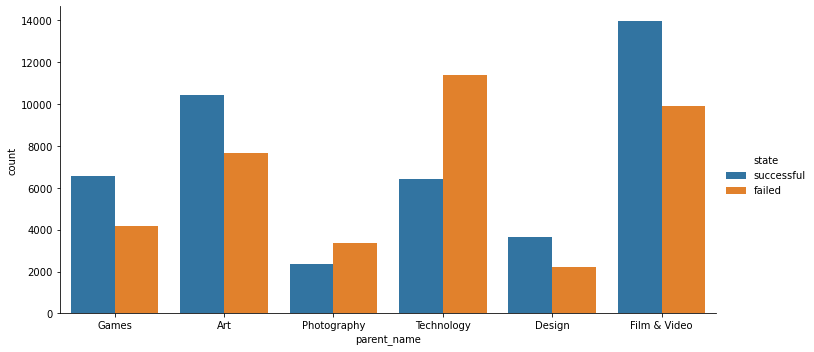

In [9]:
sns.catplot(x = 'parent_name', kind = 'count', hue="state", data=df, aspect=2);

In [36]:
((df.query('parent_name == "Games" and state == "successful"').count() / df.query('parent_name == "Games"').count())[1].round(3))

0.613

In [37]:
((df.query('parent_name == "Art" and state == "successful"').count() / df.query('parent_name == "Art"').count())[1].round(3))

0.577

In [38]:
((df.query('parent_name == "Photography" and state == "successful"').count() / df.query('parent_name == "Photography"').count())[1].round(3))

0.413

In [39]:
((df.query('parent_name == "Technology" and state == "successful"').count() / df.query('parent_name == "Technology"').count())[1].round(3))

0.361

In [40]:
((df.query('parent_name == "Design" and state == "successful"').count() / df.query('parent_name == "Design"').count())[1]).round(3)

0.621

In [41]:
((df.query('parent_name == "Film & Video" and state == "successful"').count() / df.query('parent_name == "Film & Video"').count())[1]).round(3)

0.584

In [47]:
category = ['Games', 'Art', 'Photography', 'Technology', 'Design', 'Film & Video']
category = pd.DataFrame(category, columns = ['category'])
rel_cat_successful = [0.613, 0.577, 0.413, 0.361, 0.621, 0.584]
rel_cat_successful = pd.DataFrame(rel_cat_successful, columns = ['rel_cat_successful'])
df_goal = pd.concat([category, rel_cat_successful], axis=1)
df_goal

,category,rel_cat_successful
0,Games,0.613
1,Art,0.577
2,Photography,0.413
3,Technology,0.361
4,Design,0.621
5,Film & Video,0.584


## goal

In [34]:
df_suc = df.query('state == "successful"')
df_fai = df.query('state == "failed"')

In [35]:
df_suc['goal'].mean()

12648.644643812251

In [36]:
df_suc['goal'].median()

4000.0

In [37]:
df_fai['goal'].mean()

120897.88383911007

In [38]:
df_fai['goal'].median()

8800.0

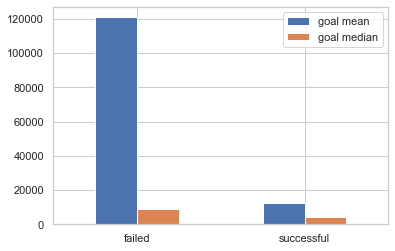

In [95]:
df_mean_goal = df.groupby(['state'])['goal'].mean().round(2).reset_index()
df_median_goal = df.groupby(['state'])['goal'].median().reset_index()
c = pd.merge(df_mean_goal, df_median_goal, on=['state'], suffixes=[' mean', ' median']).plot(kind='bar')
c.set_xticklabels(['failed', 'successful'], rotation=0);

## duration

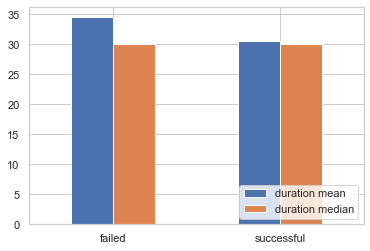

In [111]:
df_mean_duration = df.groupby(['state'])['duration_days'].mean().round(2).reset_index()
df_median_duration = df.groupby(['state'])['duration_days'].median().reset_index()
d = pd.merge(df_mean_duration, df_median_duration, on=['state'], suffixes=[' mean', ' median']).plot(kind='bar')
legend = ['duration mean', 'duration median']
d.legend(legend,loc=4)
d.set_xticklabels(['failed', 'successful'], rotation=0);

## Season

In [49]:
# making a categorical variable for launched_month q1, q2, q3, q4 
df.loc[df['launched_month'] <  4, 'time_yr'] = 'q1'
df.loc[(df['launched_month'] >=  4) & (df['launched_month'] <  7), 'time_yr'] = 'q2'
df.loc[(df['launched_month'] >=  7) & (df['launched_month'] <  10), 'time_yr'] = 'q3'
df.loc[df['launched_month'] >  9, 'time_yr'] = 'q4'

In [53]:
df['usd_pledged'].mean()

18161.84127700034

In [60]:
df['usd_pledged'].median()

1321.0

In [65]:
df.columns

Index(['goal', 'staff_pick', 'state', 'usd_pledged', 'blurb_len_w',
       'slug_len_w', 'launched_month', 'duration_days', 'preparation',
       'pledged_per_backer', 'parent_name', 'time_yr'],
      dtype='object')

In [66]:
df.time_yr.head()

0     q3
2     q1
15    q3
16    q4
18    q1
Name: time_yr, dtype: object

In [80]:
df.parent_name.unique()

array(['Games', 'Art', 'Photography', 'Technology', 'Design',
       'Film & Video'], dtype=object)

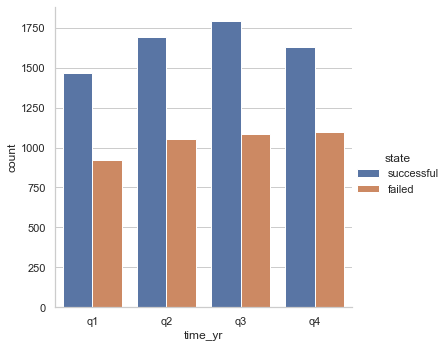

In [81]:
#sns.set(style="whitegrid", color_codes=True)
fig1 = sns.catplot(x='time_yr', kind='count', hue = 'state', data=df[df['parent_name']=='Games'], order = ['q1', 'q2', 'q3', 'q4'])
#fig1.set_xticklabels(['q1', 'q2', 'q3', 'q4'])

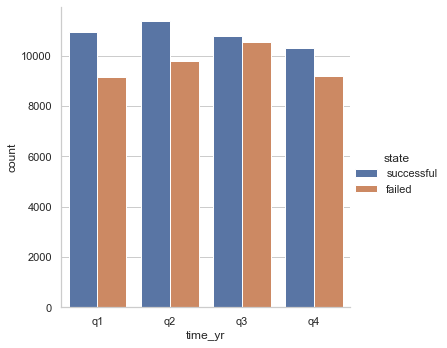

In [82]:
#sns.set(style="whitegrid", color_codes=True)
fig1 = sns.catplot(x='time_yr', kind='count', hue = 'state', data=df, order = ['q1', 'q2', 'q3', 'q4'])
#fig1.set_xticklabels(['q1', 'q2', 'q3', 'q4'])

In [97]:
((df.query('time_yr == "q1" and state == "successful"').count() / df.query('time_yr == "q1"').count())[1].round(3))

0.544

In [98]:
((df.query('time_yr == "q2" and state == "successful"').count() / df.query('time_yr == "q2"').count())[1].round(3))

0.538

In [99]:
((df.query('time_yr == "q3" and state == "successful"').count() / df.query('time_yr == "q3"').count())[1].round(3))

0.506

In [100]:
((df.query('time_yr == "q4" and state == "successful"').count() / df.query('time_yr == "q4"').count())[1].round(3))

0.528

In [101]:
time_yr = ['q1', 'q2', 'q3', 'q4']
time_yr = pd.DataFrame(time_yr, columns = ['time_yr'])
rel_time_successful = [0.544, 0.538, 0.506, 0.528]
rel_time_successful = pd.DataFrame(rel_time_successful, columns = ['rel_time_successful'])
df_time = pd.concat([time_yr, rel_time_successful], axis=1)
df_time

,time_yr,rel_time_successful
0,q1,0.544
1,q2,0.538
2,q3,0.506
3,q4,0.528


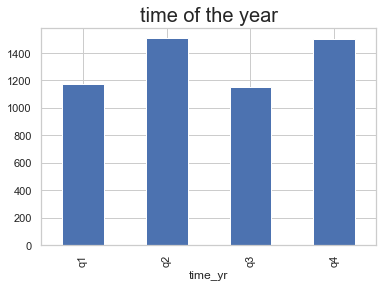

In [61]:
df.groupby(['time_yr'])['usd_pledged'].median().plot(kind="bar");
plt.title("time of the year", fontsize=20);

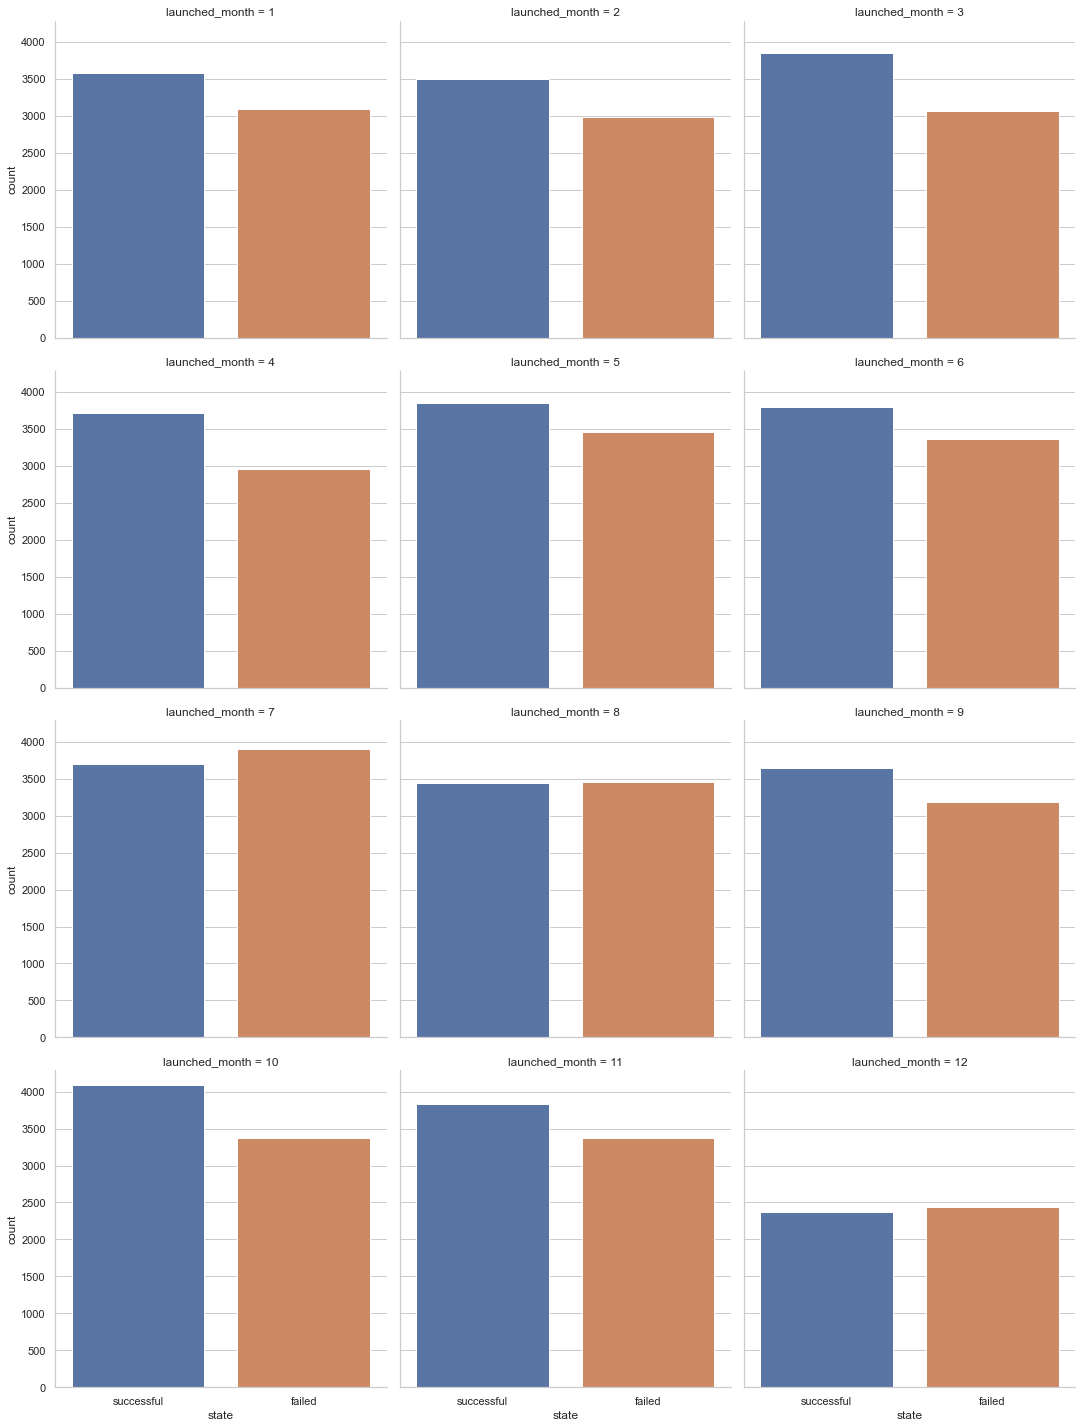

In [31]:
sns.set(style="whitegrid", color_codes=True)
sns.catplot(x="state", col='launched_month', data=df, kind="count", col_wrap=3);

## rewards

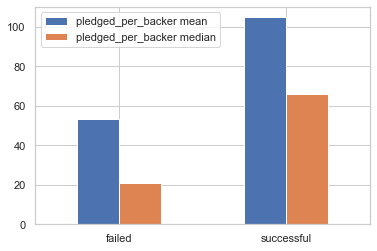

In [94]:
df_mean_rewards = df.groupby(['state'])['pledged_per_backer'].mean().round(2).reset_index()
df_median_rewards = df.groupby(['state'])['pledged_per_backer'].median().reset_index()
b = pd.merge(df_mean_rewards, df_median_rewards, on=['state'], suffixes=[' mean', ' median']).plot(kind='bar');
b.set_xticklabels(['failed', 'successful'], rotation=0);

## preparation

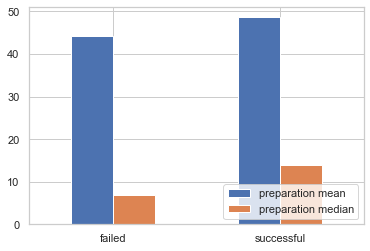

In [110]:
df_mean_preparation = df.groupby(['state'])['preparation'].mean().round(2).reset_index()
df_median_preparation = df.groupby(['state'])['preparation'].median().reset_index()
a = pd.merge(df_mean_preparation, df_median_preparation, on=['state'], suffixes=[' mean', ' median']).plot(kind='bar')
legend = ['preparation mean', 'preparation median']
a.legend(legend,loc=4)
a.set_xticklabels(['failed', 'successful'], rotation=0);

## blurb

In [32]:
df_mean_blurb = df.groupby(['state'])['blurb_len_w'].mean().round(2).reset_index()
df_median_blurb = df.groupby(['state'])['blurb_len_w'].median().reset_index()
pd.merge(df_mean_blurb, df_median_blurb, on=['state'], suffixes=[' mean', ' median'])

,state,blurb_len_w mean,blurb_len_w median
0,failed,19.09,20
1,successful,18.67,20


## slug

In [33]:
df_mean_slug = df.groupby(['state'])['slug_len_w'].mean().round(2).reset_index()
df_median_slug = df.groupby(['state'])['slug_len_w'].median().reset_index()
pd.merge(df_mean_slug, df_median_slug, on=['state'], suffixes=[' mean', ' median'])

,state,slug_len_w mean,slug_len_w median
0,failed,4.99,5
1,successful,5.50,5
